### T1. Visualisation des Métriques et Calcul des Informations Pertinentes

In [11]:
import pandas as pd

# Charger les données du fichier CSV
file_path = 'jfreechart-test-stats.csv'
data = pd.read_csv(file_path)

data.head()


,class,TLOC,WMC,TASSERT
0,./src/test/java/org/jfree/chart/annotations/Ca...,107,8,27
1,./src/test/java/org/jfree/chart/annotations/Ca...,96,8,30
2,./src/test/java/org/jfree/chart/annotations/Ca...,61,8,14
3,./src/test/java/org/jfree/chart/annotations/Te...,92,12,22
4,./src/test/java/org/jfree/chart/annotations/XY...,141,8,21


In [12]:
column_names = data.columns
column_names


Index(['class', 'TLOC', ' WMC', ' TASSERT'], dtype='object')

In [13]:
# Supprimer les espaces des noms de colonnes
data.columns = data.columns.str.strip()

# Vérifier les noms des colonnes après le nettoyage
column_names = data.columns
column_names


Index(['class', 'TLOC', 'WMC', 'TASSERT'], dtype='object')

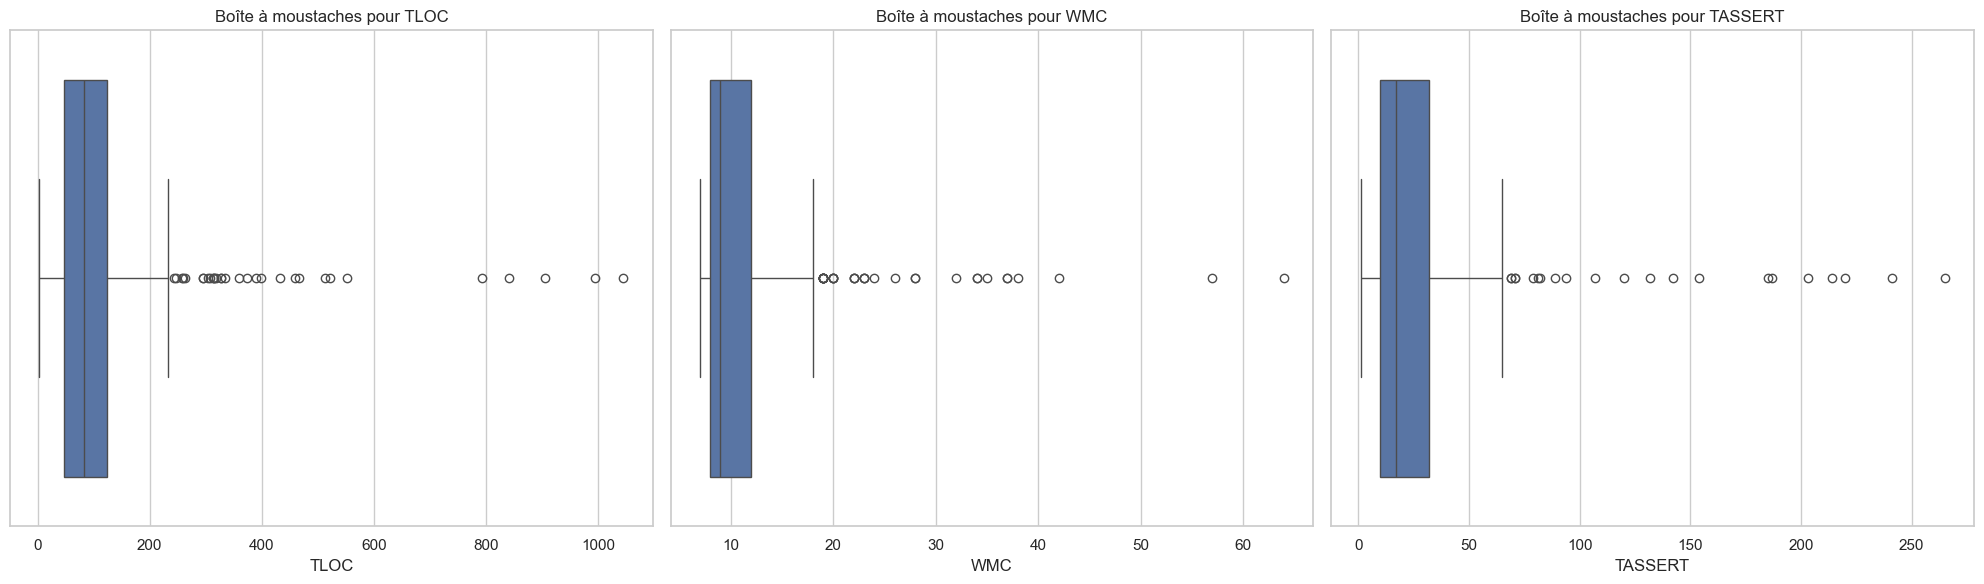

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer le style des boîtes à moustaches
sns.set(style="whitegrid")

# Créer des boîtes à moustaches pour TLOC, WMC, et TASSERT
plt.figure(figsize=(20, 6))

# Boîte à moustaches pour TLOC
plt.subplot(1, 3, 1)
sns.boxplot(x=data['TLOC'])
plt.title('Boîte à moustaches pour TLOC')

# Boîte à moustaches pour WMC
plt.subplot(1, 3, 2)
sns.boxplot(x=data['WMC'])
plt.title('Boîte à moustaches pour WMC')

# Boîte à moustaches pour TASSERT
plt.subplot(1, 3, 3)
sns.boxplot(x=data['TASSERT'])
plt.title('Boîte à moustaches pour TASSERT')

# Afficher les boîtes à moustaches
plt.tight_layout()
plt.show()


In [15]:

# Calculer les statistiques descriptives pour TLOC, WMC, et TASSERT
stats = data.describe()

# Create new rows for the box size and  lower and upper whiskers
box_size = stats.loc['75%'] - stats.loc['25%']
lower_whisker = stats.loc['25%'] - (1.5 * (stats.loc['75%'] - stats.loc['25%']))
upper_whisker = stats.loc['75%'] + (1.5 * (stats.loc['75%'] - stats.loc['25%']))


# Add the box size and lower and upper whiskers to the descriptive statistics
stats.loc['box_size'] = box_size
stats.loc['lower_whisker'] = lower_whisker
stats.loc['upper_whisker'] = upper_whisker

stats

,TLOC,WMC,TASSERT
count,351.000000,351.000000,351.000000
mean,115.133903,11.584046,27.193732
std,130.874932,6.533271,34.796175
min,3.000000,7.000000,1.000000
25%,47.500000,8.000000,10.000000
50%,83.000000,9.000000,17.000000
75%,124.500000,12.000000,32.000000
max,1045.000000,64.000000,265.000000
box_size,77.000000,4.000000,22.000000
lower_whisker,-68.000000,2.000000,-23.000000


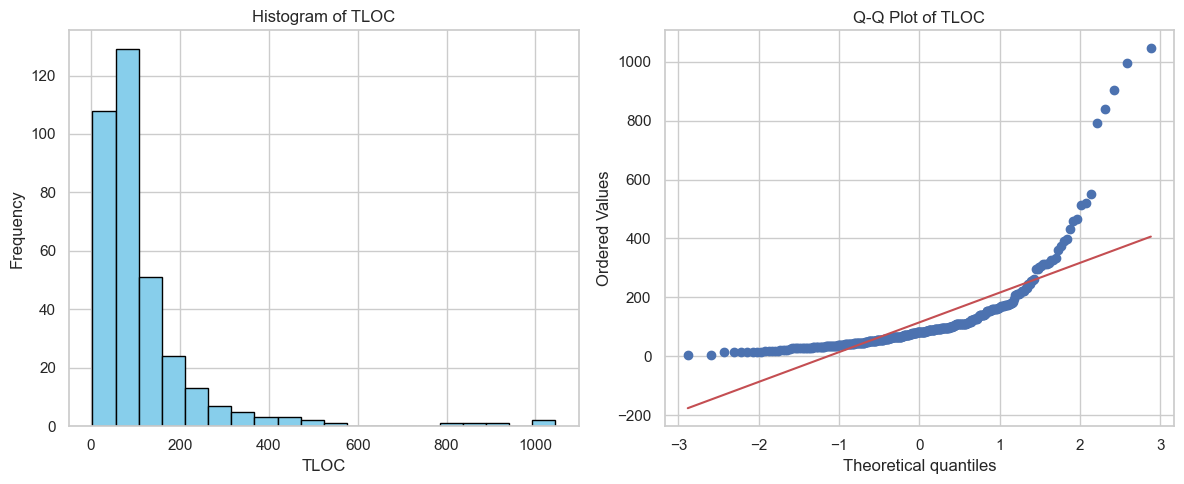

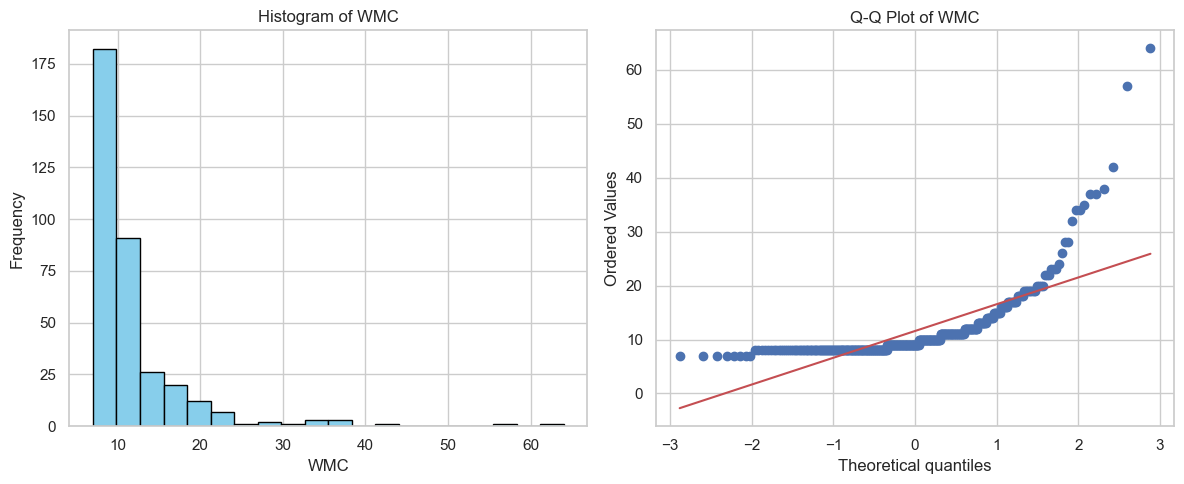

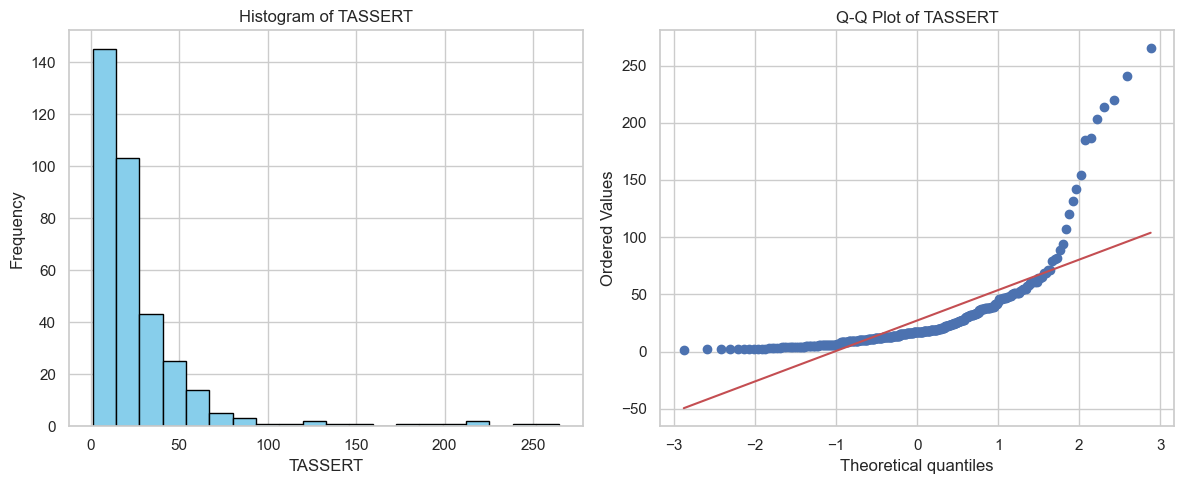

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to create a histogram and a Q-Q plot for a given variable
def plot_variable_distribution(data, variable_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    # plt.figure(figsize=(6, 4))


    # Histogram
    ax[0].hist(data[variable_name], bins=20, color='skyblue', edgecolor='black')
    ax[0].set_title(f'Histogram of {variable_name}')
    ax[0].set_xlabel(variable_name)
    ax[0].set_ylabel('Frequency')
    # plt.hist(data[variable_name], bins=20, color='skyblue', edgecolor='black')
    # plt.title(f'Histogram of {variable_name}')
    # plt.xlabel(variable_name)
    # plt.ylabel('Frequency')
    

    # # Q-Q plot
    stats.probplot(data[variable_name], dist="norm", plot=ax[1])
    ax[1].set_title(f'Q-Q Plot of {variable_name}')

    plt.tight_layout()
    plt.show()

# Plotting for TLOC, WMC, and TASSERT
plot_variable_distribution(data, 'TLOC')
plot_variable_distribution(data, 'WMC')
plot_variable_distribution(data, 'TASSERT')


### T2.Étude des Corrélations et Calcul des Droites de Régression

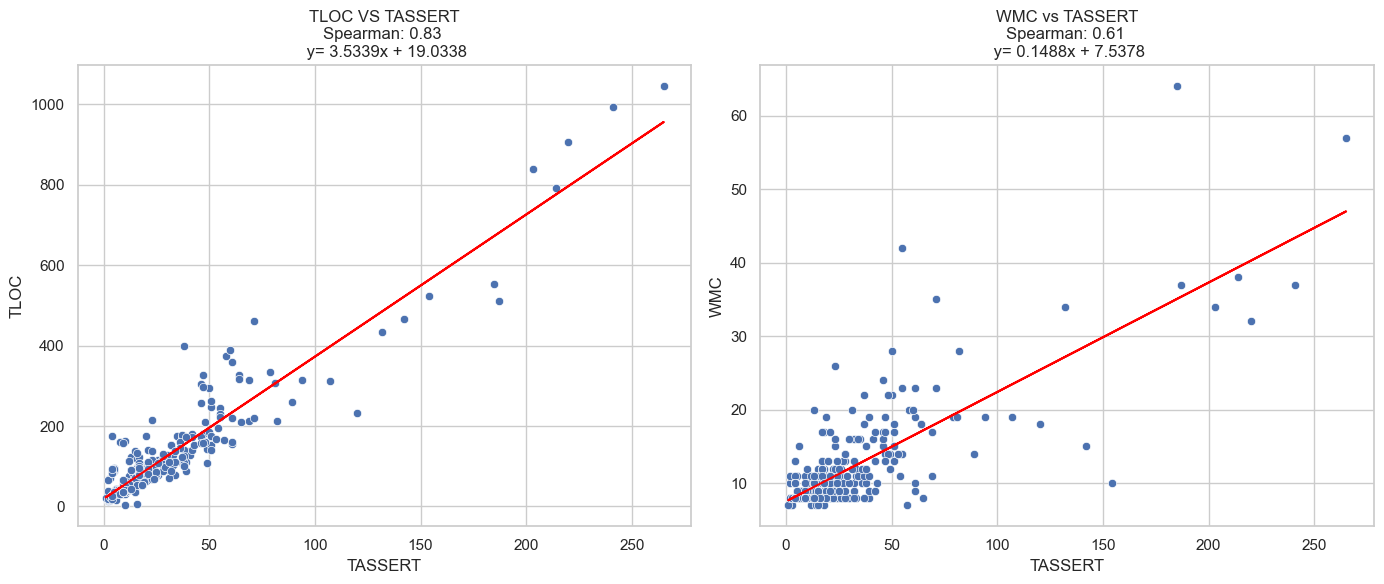

(SignificanceResult(statistic=0.834606519587501, pvalue=2.1276357013448774e-92),
 SignificanceResult(statistic=0.6149330438016306, pvalue=6.893133521020008e-38),
 3.533907484801359,
 19.03376939478927,
 0.14879335952427117,
 7.537798812936837)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

# Calculating Spearman correlation coefficients
spearman_corr_tloc_tassert = spearmanr(data['TLOC'], data['TASSERT'])
spearman_corr_wmc_tassert = spearmanr(data['WMC'], data['TASSERT'])

# Calculating regression parameters for visualization
# We use linear regression as an approximation for visualization purposes
slope_tassert_tloc_vis, intercept_tassert_tloc_vis = np.polyfit(data['TASSERT'], data['TLOC'], 1)
slope_tassert_wmc_vis, intercept_tassert_wmc_vis = np.polyfit(data['TASSERT'], data['WMC'], 1)

# Visualizing the relationships with regression lines
plt.figure(figsize=(14, 6))

# TASSERT vs TLOC
plt.subplot(1, 2, 1)
sns.scatterplot(x='TASSERT', y='TLOC', data=data)
plt.plot(data['TASSERT'], slope_tassert_tloc_vis * data['TASSERT'] + intercept_tassert_tloc_vis, color='red')  # Regression line
plt.title('TLOC VS TASSERT\nSpearman: {:.2f} \n y= 3.5339x + 19.0338'.format(spearman_corr_tloc_tassert.correlation))

# TASSERT vs WMC
plt.subplot(1, 2, 2)
sns.scatterplot(x='TASSERT', y='WMC', data=data)
plt.plot(data['TASSERT'], slope_tassert_wmc_vis * data['TASSERT'] + intercept_tassert_wmc_vis, color='red')  # Regression line
plt.title('WMC vs TASSERT\nSpearman: {:.2f} \n y= 0.1488x + 7.5378'.format(spearman_corr_wmc_tassert.correlation))

plt.tight_layout()
plt.show()

# Displaying Spearman correlation coefficients and regression parameters
spearman_corr_tloc_tassert, spearman_corr_wmc_tassert, slope_tassert_tloc_vis, intercept_tassert_tloc_vis, slope_tassert_wmc_vis, intercept_tassert_wmc_vis


In [18]:
# Removing outliers from the data
data_no_outliers = data.copy()
for column in ['TLOC', 'WMC', 'TASSERT']:
    data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_whisker[column]) & 
                                        (data_no_outliers[column] <= upper_whisker[column])]

# Display the updated descriptive statistics without outliers
data_no_outliers.describe()


,TLOC,WMC,TASSERT
count,306.000000,306.000000,306.000000
mean,79.032680,9.732026,18.156863
std,43.799606,2.247057,12.848738
min,3.000000,7.000000,1.000000
25%,44.000000,8.000000,9.000000
50%,73.000000,9.000000,15.000000
75%,101.750000,11.000000,23.000000
max,223.000000,18.000000,65.000000


In [19]:
from scipy.stats import spearmanr

# Calculating Spearman correlation coefficients for the dataset without outliers
spearman_corr_tloc_tassert_no_outliers = spearmanr(data_no_outliers['TLOC'], data_no_outliers['TASSERT'])
spearman_corr_wmc_tassert_no_outliers = spearmanr(data_no_outliers['WMC'], data_no_outliers['TASSERT'])

# Displaying the Spearman correlation coefficients
spearman_corr_tloc_tassert_no_outliers, spearman_corr_wmc_tassert_no_outliers


(SignificanceResult(statistic=0.7686091843459607, pvalue=6.224690553517323e-61),
 SignificanceResult(statistic=0.45954741083569395, pvalue=2.152728110619756e-17))

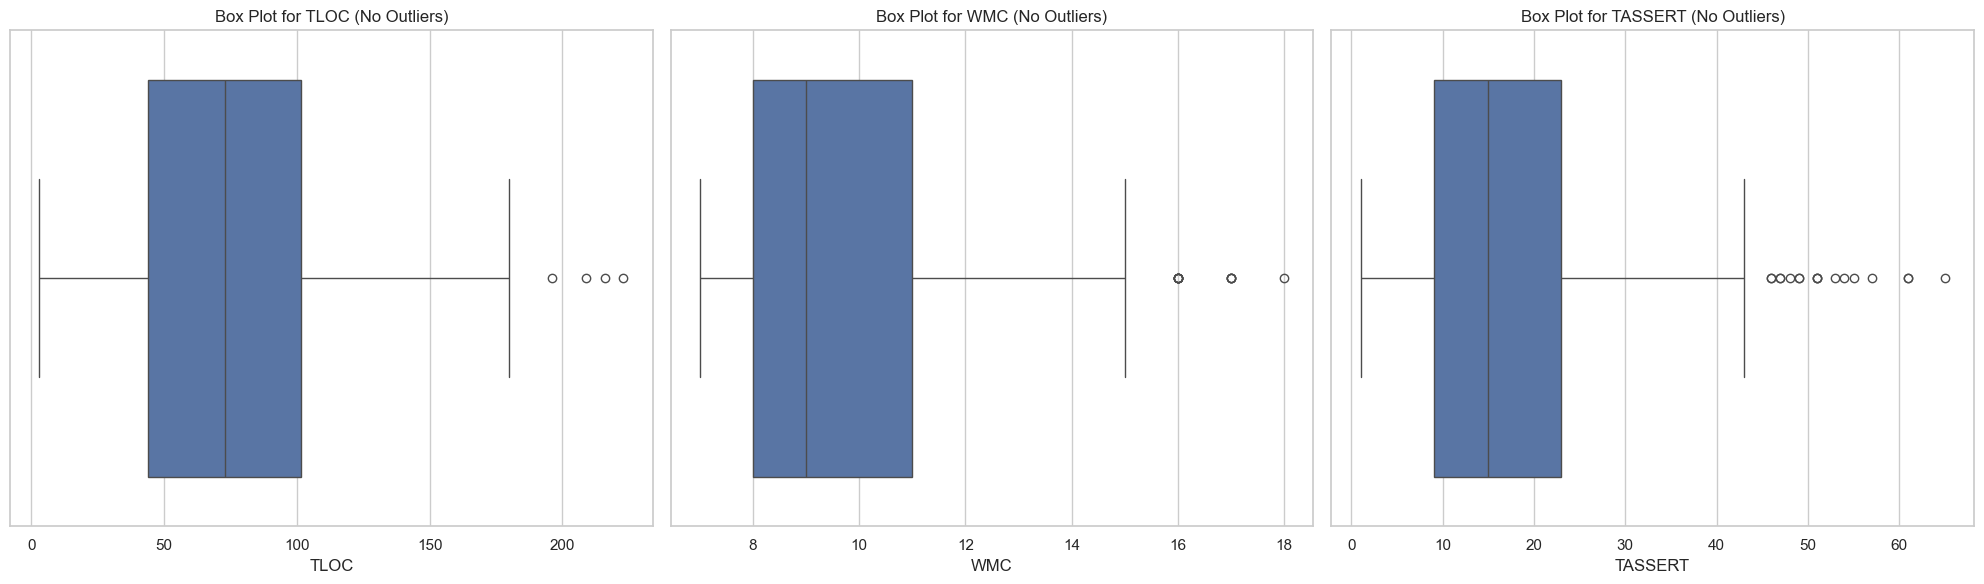

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring the style of the box plots
sns.set(style="whitegrid")

# Creating box plots for TLOC, WMC, and TASSERT without outliers
plt.figure(figsize=(20, 6))

# Box plot for TLOC
plt.subplot(1, 3, 1)
sns.boxplot(x=data_no_outliers['TLOC'])
plt.title('Box Plot for TLOC (No Outliers)')

# Box plot for WMC
plt.subplot(1, 3, 2)
sns.boxplot(x=data_no_outliers['WMC'])
plt.title('Box Plot for WMC (No Outliers)')

# Box plot for TASSERT
plt.subplot(1, 3, 3)
sns.boxplot(x=data_no_outliers['TASSERT'])
plt.title('Box Plot for TASSERT (No Outliers)')

# Display the box plots
plt.tight_layout()
plt.show()


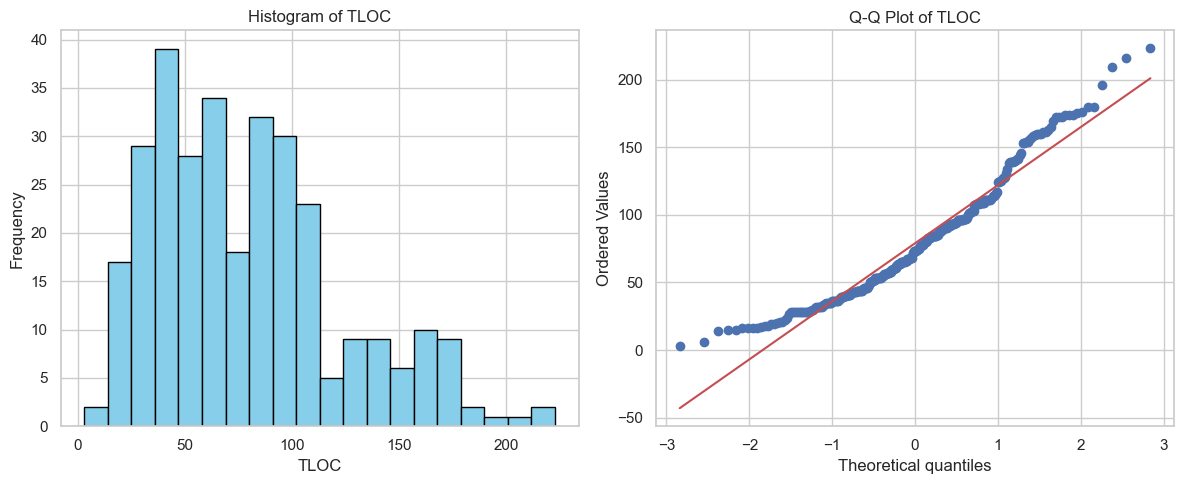

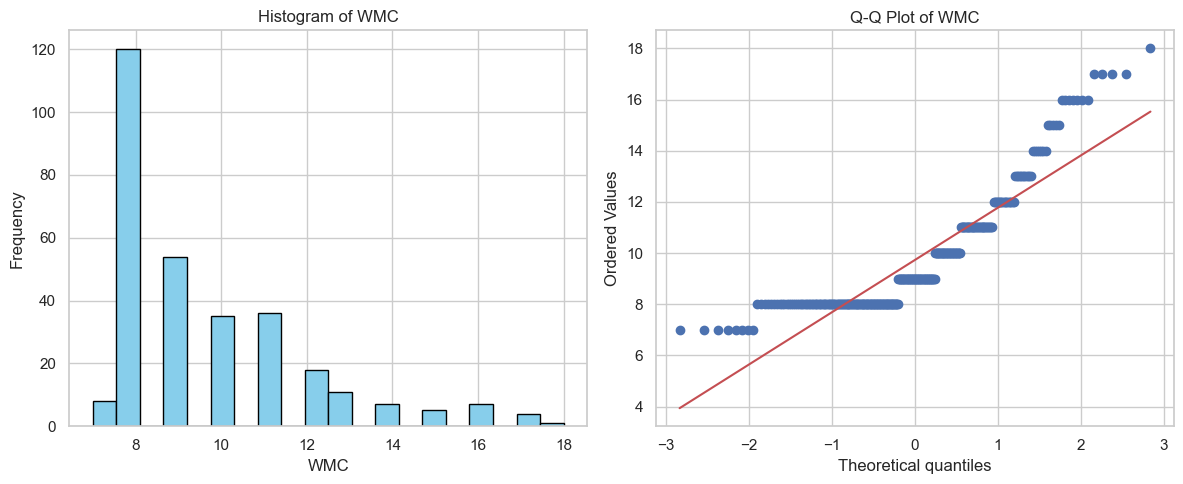

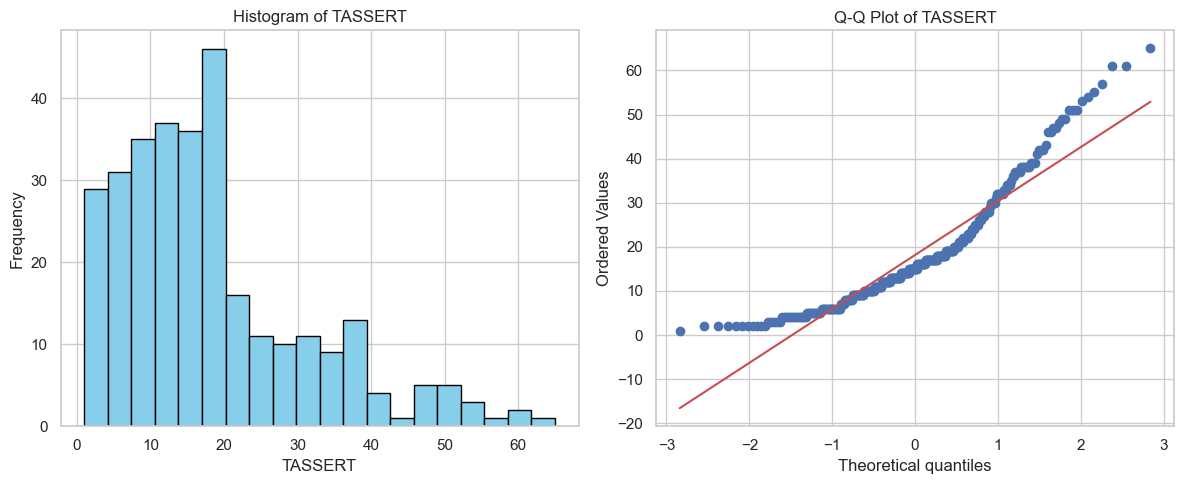

In [21]:
import scipy.stats as stats

# Function to create a histogram and a Q-Q plot for a given variable
def plot_variable_distribution(data, variable_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    ax[0].hist(data[variable_name], bins=20, color='skyblue', edgecolor='black')
    ax[0].set_title(f'Histogram of {variable_name}')
    ax[0].set_xlabel(variable_name)
    ax[0].set_ylabel('Frequency')
    
    # Q-Q plot
    stats.probplot(data[variable_name], dist="norm", plot=ax[1])
    ax[1].set_title(f'Q-Q Plot of {variable_name}')

    plt.tight_layout()
    plt.show()

# Plotting for TLOC, WMC, and TASSERT without outliers
plot_variable_distribution(data_no_outliers, 'TLOC')
plot_variable_distribution(data_no_outliers, 'WMC')
plot_variable_distribution(data_no_outliers, 'TASSERT')


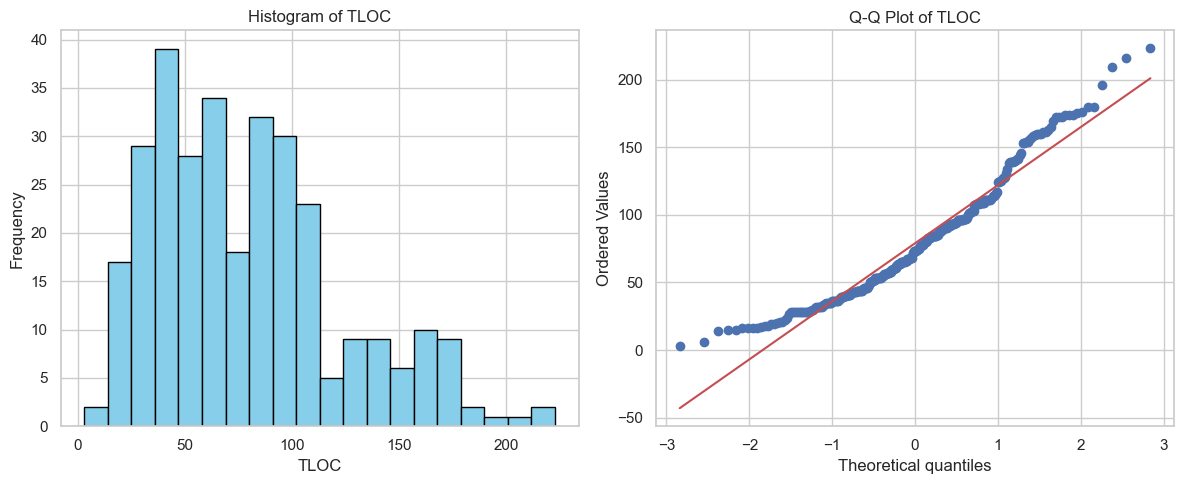

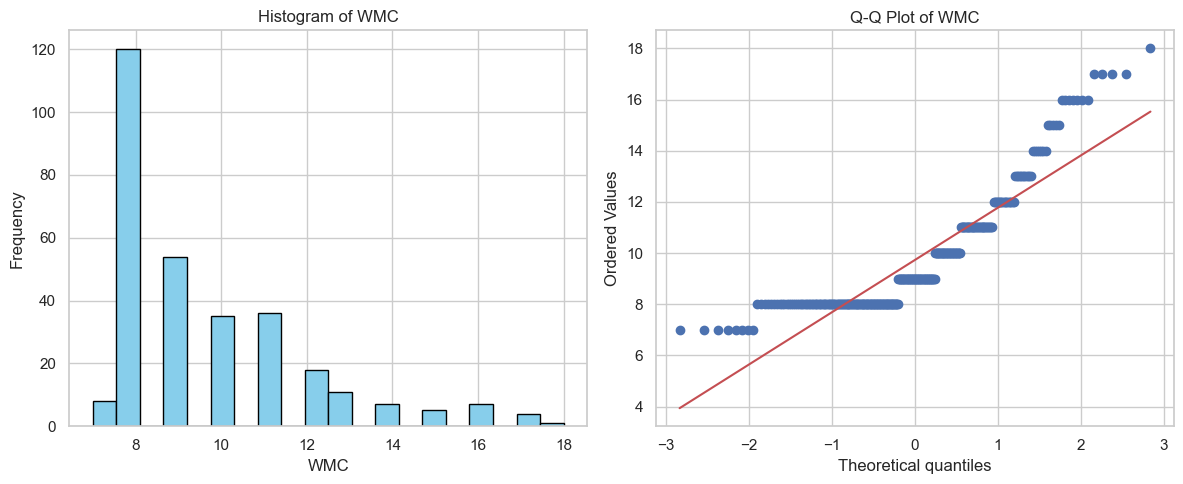

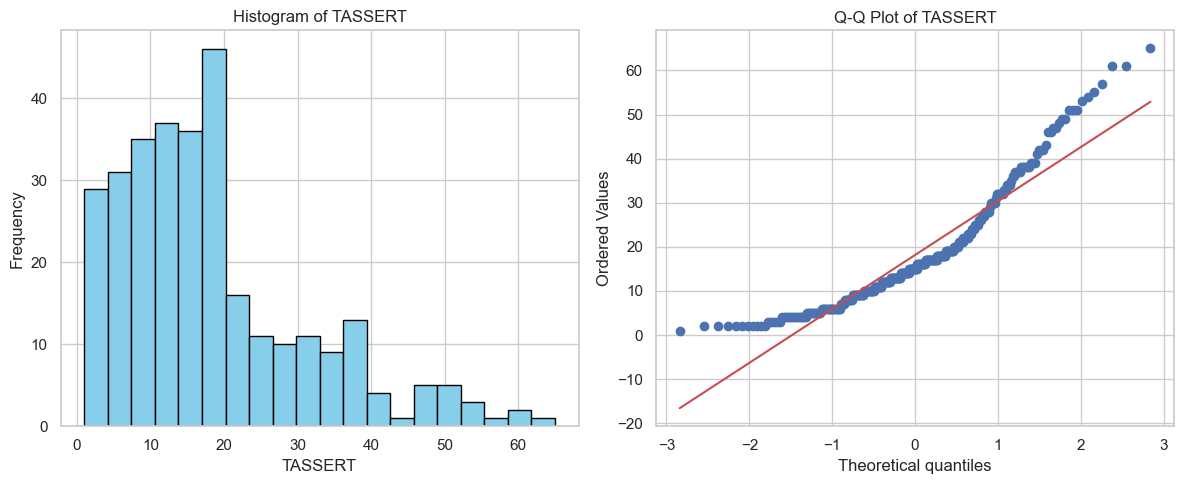

In [22]:
import scipy.stats as stats

# Function to create a histogram and a Q-Q plot for a given variable
def plot_variable_distribution(data, variable_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    ax[0].hist(data[variable_name], bins=20, color='skyblue', edgecolor='black')
    ax[0].set_title(f'Histogram of {variable_name}')
    ax[0].set_xlabel(variable_name)
    ax[0].set_ylabel('Frequency')
    
    # Q-Q plot
    stats.probplot(data[variable_name], dist="norm", plot=ax[1])
    ax[1].set_title(f'Q-Q Plot of {variable_name}')

    plt.tight_layout()
    plt.show()

# Plotting for TLOC, WMC, and TASSERT without outliers
plot_variable_distribution(data_no_outliers, 'TLOC')
plot_variable_distribution(data_no_outliers, 'WMC')
plot_variable_distribution(data_no_outliers, 'TASSERT')


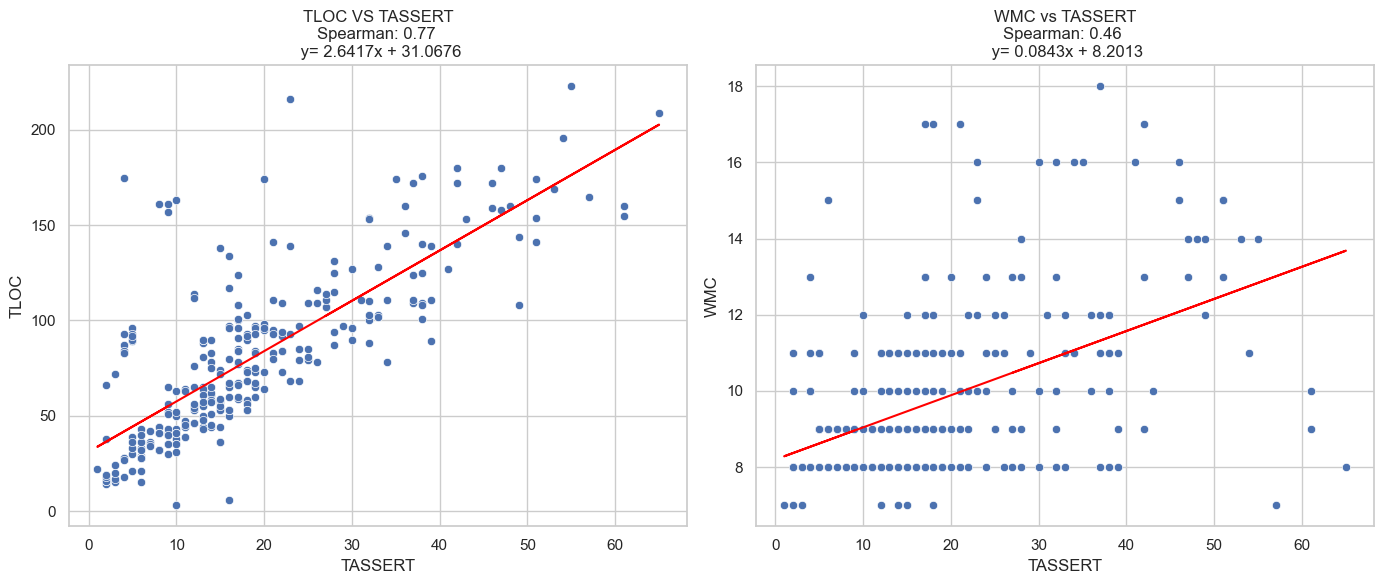

(2.6417061530170063,
 31.067583705351336,
 0.08430296856356931,
 8.201348714577806)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculating regression parameters for visualization with the dataset without outliers
slope_tassert_tloc_vis_no_outliers, intercept_tassert_tloc_vis_no_outliers = np.polyfit(data_no_outliers['TASSERT'], data_no_outliers['TLOC'], 1)
slope_tassert_wmc_vis_no_outliers, intercept_tassert_wmc_vis_no_outliers = np.polyfit(data_no_outliers['TASSERT'], data_no_outliers['WMC'], 1)

# Visualizing the relationships with regression lines
plt.figure(figsize=(14, 6))

# TASSERT vs TLOC
plt.subplot(1, 2, 1)
sns.scatterplot(x='TASSERT', y='TLOC', data=data_no_outliers)
plt.plot(data_no_outliers['TASSERT'], slope_tassert_tloc_vis_no_outliers * data_no_outliers['TASSERT'] + intercept_tassert_tloc_vis_no_outliers, color='red')  # Regression line
plt.title(f'TLOC VS TASSERT\nSpearman: {spearman_corr_tloc_tassert_no_outliers.correlation:.2f} \n y= {slope_tassert_tloc_vis_no_outliers:.4f}x + {intercept_tassert_tloc_vis_no_outliers:.4f}')

# TASSERT vs WMC
plt.subplot(1, 2, 2)
sns.scatterplot(x='TASSERT', y='WMC', data=data_no_outliers)
plt.plot(data_no_outliers['TASSERT'], slope_tassert_wmc_vis_no_outliers * data_no_outliers['TASSERT'] + intercept_tassert_wmc_vis_no_outliers, color='red')  # Regression line
plt.title(f'WMC vs TASSERT\nSpearman: {spearman_corr_wmc_tassert_no_outliers.correlation:.2f} \n y= {slope_tassert_wmc_vis_no_outliers:.4f}x + {intercept_tassert_wmc_vis_no_outliers:.4f}')

plt.tight_layout()
plt.show()

# Displaying regression parameters
(slope_tassert_tloc_vis_no_outliers, intercept_tassert_tloc_vis_no_outliers, slope_tassert_wmc_vis_no_outliers, intercept_tassert_wmc_vis_no_outliers)
